# **A Predictive Analysis of Heart Disease**

ADS 599 | Team 3 | Anusia Edward & Saba Alemayehu

>[A Predictive Analysis of Heart Disease](#scrollTo=vbomqAF_uHfS)

>>[Modeling and Evaluations](#scrollTo=FCYQAdPEuv0f)

>>>[Model 1: Logistic Regression](#scrollTo=8xVD6TRsXvx2)

>>>[Model 2: Naive Bayes](#scrollTo=Jgcp18KaXxyO)

>>>[Model 3: Neural Network](#scrollTo=gcCVDeOiXzwP)

>>>[Model 4: Decision Tree](#scrollTo=P-EGjzJpX2AD)

>>>[Model 5: Random Forest](#scrollTo=12IQDjr6X4GW)

>>>[Model 6: Linear Discriminant Analysis (LDA)](#scrollTo=wPgkEgL7X_N4)

>>[References](#scrollTo=z9aI711yalFu)



In [ ]:
# Necessary Imports
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from plotly.subplots import make_subplots
import plotly.express as px
import plotly.graph_objects as go

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB, GaussianNB
from sklearn.metrics import (confusion_matrix, accuracy_score,
classification_report)

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (RepeatedStratifiedKFold,
                                     GridSearchCV,cross_val_score)
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from keras.models import Sequential
from keras.layers import Dense

from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

## **Modeling and Evaluations**

Variables to Use:
*   ```X_train_res```
*   ```y_train_res```
*   ```x_test```
*   ```y_test```

The first step is to call the variables that were created previously under the Preprocessing and Explanatory Data Analysis (EDA) section. This can be seen in the cell below. Following this step, the six model are built.

In [ ]:
# Calling the necessary variables
X_train_res = pd.read_csv('/content/drive/MyDrive/Colab\
 Notebooks/X_train_res.csv')
y_train_res = pd.read_csv('/content/drive/MyDrive/Colab\
 Notebooks/y_train_res.csv')
x_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/x_test.csv')
y_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/y_test.csv')

### Model 1: Logistic Regression

The first model that is to be produced is the logistic regression model. The following summarizes each of the steps taken below to build the logistic regression model: The way in which the logistic regression model was set up was first by defining the model and model parameters, defining the grid search, summarizing grid search results, predicting on the test data, and then evaluating the model. The ‘model’ variable was set to the LogisticRegression() function. This function was imported from the sklearn.linear_model package. The ‘solvers’ variable was set to ‘liblinear’ in order to handle the regularization that was set in the next step. The ‘penalty’ function was set to ‘L2’. The L2 regularization, commonly referred to as Ridge Regularization, was specified in order to avoid overfitting (Sklearn.Linear_Model.LogisticRegression, n.d.). The ‘c_values’ variable was set to ‘[10, 1.0, 0.1, 0.01]’ in order to find the best splits. After the model and parameters were set, the grid search was defined. The purpose of the grid search was to find the optimal parameters for the model (Sklearn.Linear_Model.LogisticRegression, n.d.). The ‘solver’, ‘penalty’, and ‘c_values’ variables were set to the ‘grid’ variable as a dictionary to be called later. The variable ‘cv’ contained the parameters for cross validation, which was to be performed during the grid search. This was accomplished using sklearn.model_selection’s RepeatedStratifiedKFold function. Within this function the ‘n_splits’ parameter was set to 10, ‘n_repeats’ was set to 3, and the ‘random_state’ was set to 1. The ‘n_splits’ parameter refers to how many times the data is to be split, or the number of folds, while the ‘n_repeats’ parameter refers to how many times the cross validator needs to be repeated. The ‘random_state’ parameter ensures that the results are repeatable. The gridsearch was then fitted onto the train data using the following function: grid_search.fit(x_train, y_train) and saved under the ‘grid_result’ variable. The results from the grid search were pulled through the following functions: gird_result.best_score_ and grid_result.best_params_. From here, it should be noted that the best results were found using the following parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}. The logistic model with the best parameters was then applied to the test data using the following function grid_result.predict(x_test), and then the results were saved under the ‘lr_pred’ variable. Finally, the model was evaluated using sklearn.metrics’s confusion_matrix function and classification_report function. Additionally, sklearn.metrics‘s roc_curve function and matplotlib.pyplot’s plt.plot function were utilized to evaluate the results obtained.


Best: 0.861879 using {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
              precision    recall  f1-score   support

           0       0.94      0.87      0.91      3510
           1       0.25      0.45      0.32       328

    accuracy                           0.84      3838
   macro avg       0.60      0.66      0.61      3838
weighted avg       0.88      0.84      0.86      3838



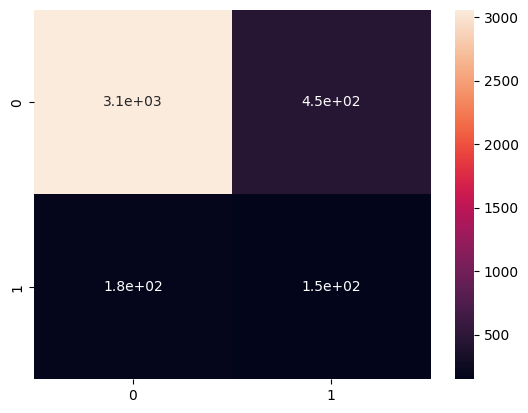

In [ ]:
# Logistic Regression
# define models and parameters
model = LogisticRegression()
solvers = ['liblinear']
penalty = ['l2']
c_values = [10, 1.0, 0.1, 0.01]

# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv,
                           scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_res, y_train_res)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Predicting on the test data
lr_pred = grid_result.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, lr_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, lr_pred))



Text(0, 0.5, 'True positive rate')

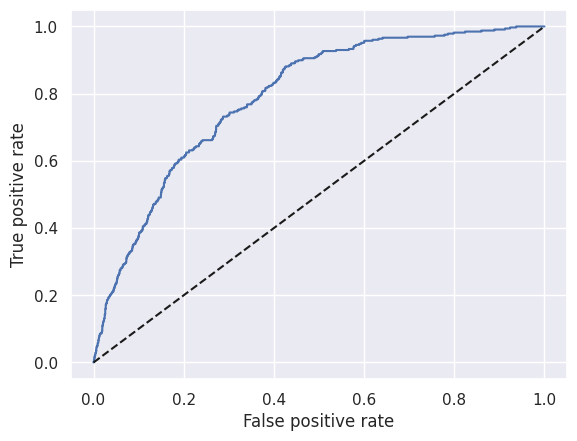

In [ ]:
# plot roc curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 2: Naive Bayes

Next, two Naive Bayes models were built. The first block of code outlines the Gaussian Naive Bayes model while the next block of code outlines the Bernoulli Naive Bayes classification model.

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      3510
           1       0.15      0.79      0.26       328

    accuracy                           0.61      3838
   macro avg       0.56      0.69      0.50      3838
weighted avg       0.90      0.61      0.70      3838



Text(0, 0.5, 'True positive rate')

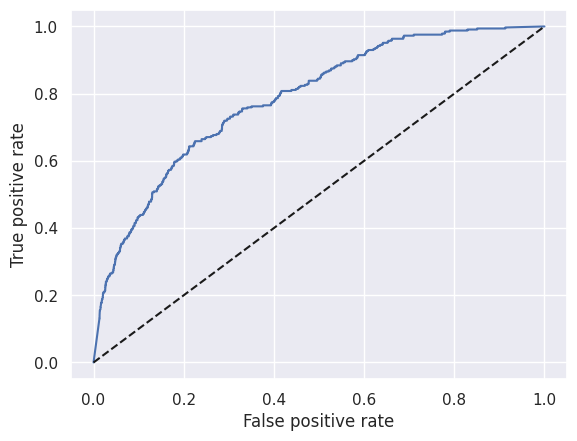

In [ ]:
# Naive Bayes - Gaussian Classifier
gnb = GaussianNB()
# Model training
gnb.fit(X_train_res, y_train_res)

# Predict Output
gnb_pred = gnb.predict(x_test)

# Classification report
print(classification_report(y_test, gnb_pred))

# plot roc curve
y_pred_proba = gnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

Considering that the target variable was binary, the Bernoulli classifier is the better model to employ. This is verified through the higher precision, f1, recall, accuracy, and ROC scores. The way in which the Bernoulli classification model was produced is outlines as follows: The model was first defined using sklearn.niave_bayes’s BernoulliNB() function and saved to the ‘bnb’ variable. The BernoulliNB() function was employed as the output variable is binary (0/1). The model was then fitted to the training data using the .fit() function resulting in the following code: bnb.fit(x_train, y_train). The predictions of the model were determined using the .predict() function resulting in the following code: bnb.predict(x_test), which was saved as ‘bnb_pred’. Finally, a classification report was outputted using sklearn.metrics’s classification_report function in order to access the model results. Additionally, an ROC curve was plotted using numpy’s .predict_proba function in conjunction with matplotlib.pyplot’s plt.plot function.


              precision    recall  f1-score   support

           0       0.97      0.77      0.86      3510
           1       0.23      0.70      0.34       328

    accuracy                           0.77      3838
   macro avg       0.60      0.74      0.60      3838
weighted avg       0.90      0.77      0.82      3838



Text(0, 0.5, 'True positive rate')

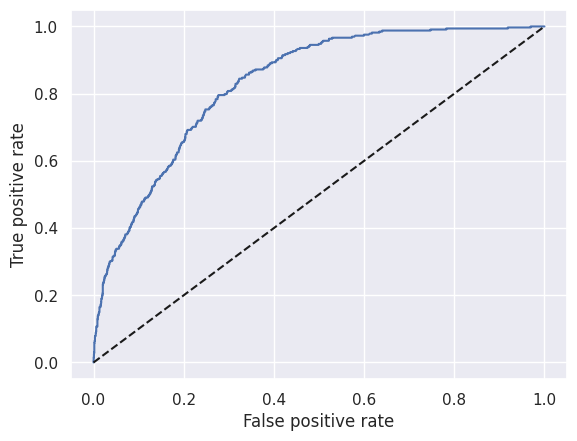

In [ ]:
# Naive Bayes - Bernoulli Classifier
bnb = BernoulliNB()
# Model training
bnb.fit(X_train_res, y_train_res)

# Predict Output
bnb_pred = bnb.predict(x_test)

# Classification report
print(classification_report(y_test, bnb_pred))

# plot roc curve
y_pred_proba = bnb.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 3: Neural Network

The third model to be built was the Neural Network model. The Neural Network model for this project was set up by first defining the Neural Network with the Sequential() function and setting this function to the ‘NN’ variable for future reference. The Sequential() function is an API that is used to organize the Keras layers for the Neural Network (Keras - Models, n.d.). The layers were defined using the .add function in conjunction with the Dense function of Keras.layers. Within the layers, the first thing defined was the units. Units are defined as the dimensionality of the output space (Keras - Models, n.d.). Next, the activation was defined followed by the input dimension. Within these layers the activation was set to relu. Essentially, relu is an activation function that aids with the vanishing gradients issue by introducing the property of nonlinearity to a deep learning model (Krishnamurthy, 2022). The optimizer for this model was set to Adam while the loss function was set to binary_crossentropy, and the metrics was set to accuracy. The optimizer was set to Adam as it is a stochastic gradient descent method that updates the parameters of the model using the first and second moments of the gradients automatically resulting in a more efficient model (Keras - Models, n.d.). The loss function was set to binary_crossentropy in order to minimize the mistakes made by the model. Essentially this function works by calculating the cross-entropy loss between the predicted classes and the true classes and works to minimize it (Keras - Models, n.d.). Finally, the metric was set to accuracy in order to optimize the model on the basis of accuracy. All of these components were then set to the model using the .compile function resulting in the following code: NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']). Then this optimized model was fitted to the train data using the .fit() function. The parameters were set such that the ‘validation_data’ parameter was indicated as the test data, ‘epochs’ was set to 40, and ‘batch_size’ was set to 32. The model was then validated using the .predict() function and the results were evaluated using sklearn.metrics’s confusion_matrix function and classification_report function.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
878/878 [==============================] - 9s 8ms/step - loss: 0.5312 - accuracy: 0.7360 - val_loss: 0.4599 - val_accuracy: 0.7668
Epoch 2/40
878/878 [==============================] - 6s 7ms/step - loss: 0.4229 - accuracy: 0.8108 - val_loss: 0.4212 - val_accuracy: 0.7858
Epoch 3/40
878/878 [==============================] - 5s 6ms/step - loss: 0.3807 - accuracy: 0.8353 - val_loss: 0.3715 - val_accuracy: 0.8142
Epoch 4/40
878/878 [========

<Axes: >

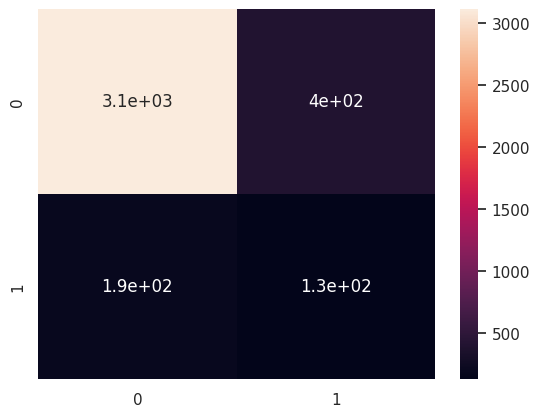

In [ ]:
# Neural Network

NN = Sequential()
NN.add(Dense(8, activation='relu', input_dim=40))
NN.add(Dense(1, activation='sigmoid'))
NN.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
NN.summary()
hist = NN.fit(X_train_res, y_train_res, validation_data=(x_test, y_test),
              epochs=40, batch_size=32)

#validate the model
nn_pred = NN.predict(x_test)> 0.5

# Classification report
print(classification_report(y_test, nn_pred))

# Confusion matrix
cm = confusion_matrix(y_test, nn_pred)
sns.heatmap(cm, annot=True)


120/120 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True positive rate')

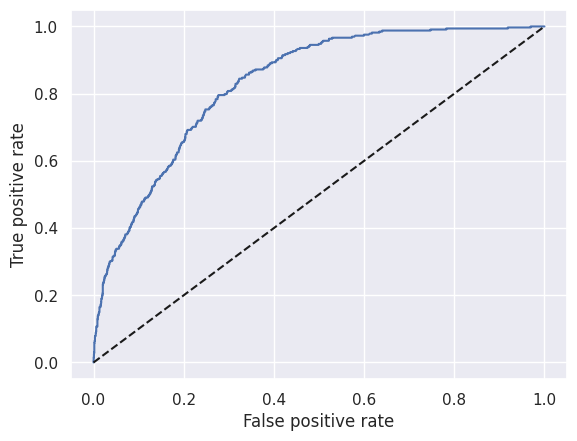

In [ ]:
# NN ROC Plot
def predict_prob(number):
  return [number[0],1-number[0]]
y_prob = np.array(list(map(predict_prob, NN.predict(x_test))))
predict_classes=np.argmax(predict_prob,axis=0)
fpr2, tpr2, threshold = roc_curve(y_test, y_prob[:,1])
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 4: Decision Tree

Here we are building a decision tree model. The first step in setting up the decision tree algorithm was to determine the decision tree depth. This was accomplished using a for-loop in which the algorithmic function was set, fitted, and predicted to output the maximum tree depth associated with the highest accuracy. When carrying out this for-loop, the maximum depth was determined to be 2 with an accuracy of 0.91. Based on this, sklearn.tree's DecisionTreeClassifier function was utilized with the specification of the tree depth as four and the ‘random_state’ set to 599. The random state was set in order for the result obtained to be reproducible. The .fit() function was then used in conjunction with the model which was saved as ‘dt’. In order to validate the model, the .predict() function was employed. Finally a classification report was outputted, using sklearn.metrics’s classification_report function, in order to access the model results. Additionally, an ROC curve was plotted using numpy’s .predict_proba function in conjunction with sklearn.metrics‘s roc_curve function and matplotlib.pyplot’s plt.plot function.


In [ ]:
#optimizing decision tree depth
score = []
for i in range(1,12):
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(X_train_res,y_train_res)
    y_pred = dtree.predict(x_test)
    score.append(round(accuracy_score(y_test,y_pred),4))
print("Maximum depth", score.index(max(score)))
print( "Maximum score", max(score))

Maximum depth 10
Maximum score 0.7499


0.7344971339239187
[[2602  908]
 [ 111  217]]
              precision    recall  f1-score   support

           0       0.96      0.74      0.84      3510
           1       0.19      0.66      0.30       328

    accuracy                           0.73      3838
   macro avg       0.58      0.70      0.57      3838
weighted avg       0.89      0.73      0.79      3838



Text(0, 0.5, 'True positive rate')

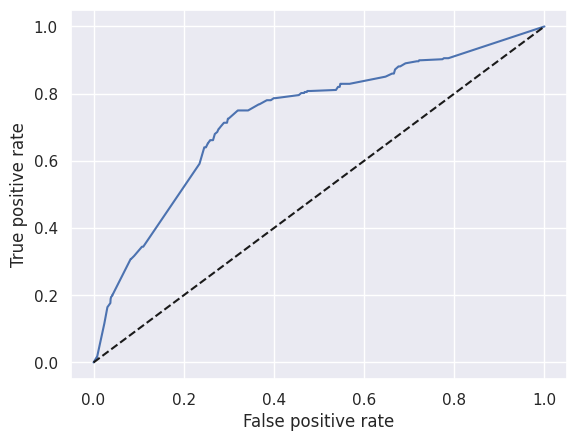

In [ ]:
# Decision Tree
dt = DecisionTreeClassifier(max_depth = 10, random_state = 599)
dt.fit(X_train_res,y_train_res)

#validate the model
dt_pred=dt.predict(x_test)
print(accuracy_score(y_test, dt_pred))

#Confusion matrix
cm=confusion_matrix(y_test,dt_pred)
print(cm)

# Classification report
print(classification_report(y_test, dt_pred))

# plot roc curve
y_pred_proba = dt.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()

plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')


### Model 5: Random Forest

The fifth model that was built was the Random Forest model as seen below. The Random Forest model was set up by first defining the hyperparameters, then setting up the model based on the hyperparameters, validating the model, and then evaluating the model’s results. The hyperparameters were set up through a hyperparameter grid which specified ‘n_estimators’ as [100, 200, 500], ‘max_depth’ as [4,5,6,7,8], and ‘criterion’ as [‘gini’, ‘entropy’]. The ‘n_estimators’ hyperparameter indicates the number of trees within the Random Forest. The ‘max_depth’ hyperparameter indicates the maximum depth of the tree. The ‘criterion’ is the function to measure the quality of the split. The ‘gini’ and ‘entropy’ criterion are essentially measures of the purity of the splits made by the Random Forest model from the root node to the leaf nodes (Dash, 2022). These were both indicated in order to find the model that was produced with the better splits based on the different forms of measurements of impurities. The best parameters, with a accuracy score of 0.820997, was deteremined using {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}. Next, the model was defined using sklearn.ensemble’s RandomForestClassifier and set to the ‘rf’ variable. The GridSearchCV function was used to determine the best hyperparameters. The estimator within this function was set to the Random Forest classifier and the ‘param_grid’ was set to the hyperparameters previously discussed. The ‘cv’ variable, which indicates the cross validation, was set to 3. Then the model was fit to the train data using the .fit() function. The model was validated using the .predict() function and finally evaluated using sklearn.metrics’s confusion_matrix function and classification_report function.


Best: 0.820997 using {'criterion': 'gini', 'max_depth': 8, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.96      0.79      0.87      3510
           1       0.23      0.67      0.35       328

    accuracy                           0.78      3838
   macro avg       0.60      0.73      0.61      3838
weighted avg       0.90      0.78      0.82      3838



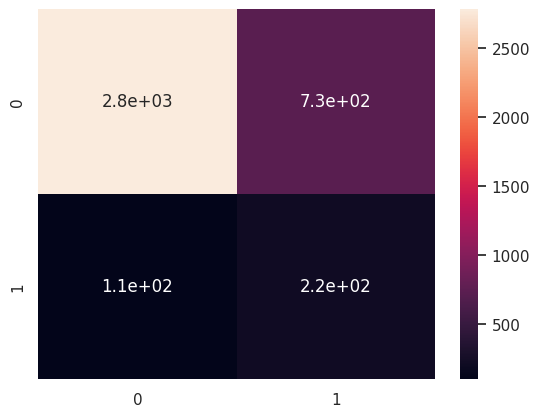

In [ ]:
#  Random Forest
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# define model and determine best params
rf=RandomForestClassifier(random_state = 599)
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 3)
rf_grid.fit(X_train_res, y_train_res)

# summarize results
print("Best: %f using %s" % (rf_grid.best_score_, rf_grid.best_params_))

#validate the model
rf_pred = rf_grid.predict(x_test)

# Confusion matrix
cm = confusion_matrix(y_test, rf_pred)
sns.heatmap(cm, annot=True)

# Classification report
print(classification_report(y_test, rf_pred))


Text(0, 0.5, 'True positive rate')

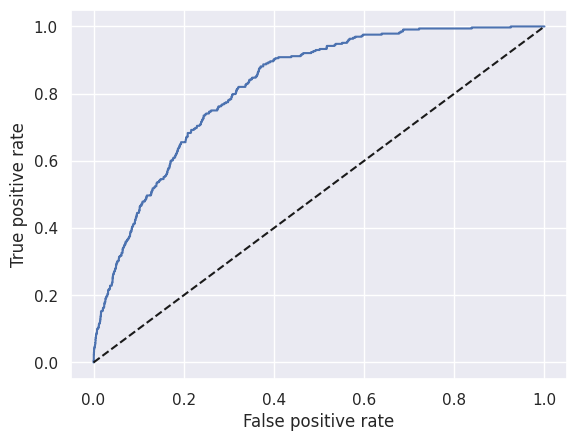

In [ ]:
# plot roc curve for random forest
y_pred_proba = rf_grid.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
sns.set()
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')

### Model 6: Linear Discriminant Analysis (LDA)

Finally, below is the code outlining how the Linear Discriminant Analysis model was built. The LDA model was first defined using sklearn.discriminant_analysis’s LinearDiscriminantAnalysis() function. Then in order to define a grid search function to determine the best hyperparameters, a general set of parameters to be tested was defined. The variable ‘cv’ contained the cross validation splits. These splits were set through the function RepeatedStratifiedKFold(), in which ‘n_splits’ was set to 10, ‘n_repeats’ was set to 3, and ‘random_state’ was set to 1. The variable ‘grid’ was defined as a dictionary in which the ‘solver’ was set to ‘svd’. The solver ‘svd’ is recommended for data with a larger number of features, which was the case for the project at hand. Then, the gridsearch was set using the GridSearch() function in order to determine the best parameters. The best hyperparameters were then fit to the train data using the .fit() function. The predictions were then determined for the test set using the .predict() function. Finally, the results were evaluated using sklearn.metrics’s confusion_matrix function and classification_report function.

In [ ]:
# Linear Discriminant Analysis (LDA)
# define model
model = LinearDiscriminantAnalysis()

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# define grid
grid = dict()
grid['solver'] = ['svd']

# define search
search = GridSearchCV(model, grid, scoring='accuracy', cv=cv, n_jobs=-1)

# perform the search
results = search.fit(X_train_res, y_train_res)

# get the hyperparameters with the best score
results.best_params_

# Predictions for test data
lda_pred = search.predict(x_test)

# Print confusion matrix
confusion_matrix(y_test, lda_pred)
print(classification_report(y_test,lda_pred))

              precision    recall  f1-score   support

           0       0.95      0.86      0.90      3510
           1       0.25      0.50      0.33       328

    accuracy                           0.83      3838
   macro avg       0.60      0.68      0.62      3838
weighted avg       0.89      0.83      0.85      3838



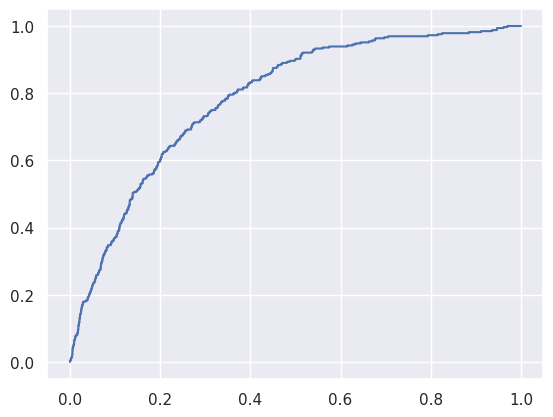

In [ ]:
#fit linear discriminant analysis  model and plot ROC curve
y_pred = results.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Linear Discriminant Analysis , AUC="+str(AUROC))

In order to compare the validity and proficiency of all six models, a combined ROC plot for each of the models was built as seen below. The results of the ROC plot indicate that the Neural Network and Bernoulli Naive Bayes models out performed the other models in terms of ROC scores. This is clear through the 0.83 AUC scores the two models, Neural Network and Bernoulli Naive Bayes, recieved.

120/120 [==============================] - 0s 1ms/step


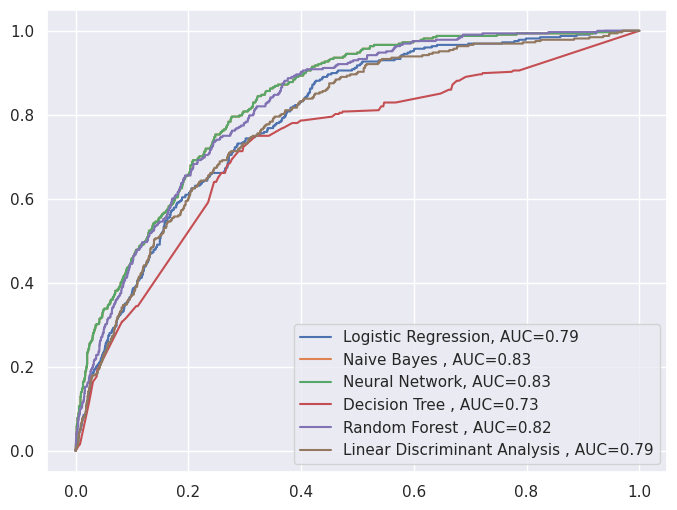

In [ ]:
# Comparison of All 6 Models

#set up plotting area
plt.figure(0).clf()

#fit logistic regression model and plot ROC curve
y_pred_proba = grid_result.predict_proba(np.array(x_test))[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
AUROC = np.round(roc_auc_score(y_test, y_pred_proba), 2)
plt.plot(fpr,tpr,label="Logistic Regression, AUC="+str(AUROC))

#fit naive bayes model and plot ROC curve
y_pred = bnb.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Naive Bayes , AUC="+str(AUROC))

# fit and plot neural network ROC curve
def predict_prob(number):
  return [number[0],1-number[0]]
y_prob = np.array(list(map(predict_prob, NN.predict(x_test))))
predict_classes=np.argmax(predict_prob,axis=0)
fpr2, tpr2, threshold = roc_curve(y_test, y_prob[:,1])
AUROC = 0.83
sns.set()
plt.plot(fpr, tpr, label="Neural Network, AUC="+str(AUROC))

#fit decision tree model and plot ROC curve
y_pred = dt.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Decision Tree , AUC="+str(AUROC))

#fit random forest model and plot ROC curve
y_pred = rf_grid.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Random Forest , AUC="+str(AUROC))

#fit linear discriminant analysis  model and plot ROC curve
y_pred = results.predict_proba(np.array(x_test))[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred)
AUROC = np.round(roc_auc_score(y_test, y_pred), 2)
plt.plot(fpr,tpr,label="Linear Discriminant Analysis , AUC="+str(AUROC))

#add legend
sns.set(rc={'figure.figsize':(8,6)})
plt.legend();


In order to further evaluate the models and compare them to one another a bar chart of the performance of each of the models was built below. The models were evaluated on the following metrics: precision, recall, F1, accuracy, and ROC scores. The model that outperformed all others models is the Neural Network model. It should be noted that LR = linear regression, BNB = Bernoulli Naive Bayes, NN = Neural Network, DT = Decision Tree, RF = Random Forest, and LDA = Linear Discriminant Analysis.

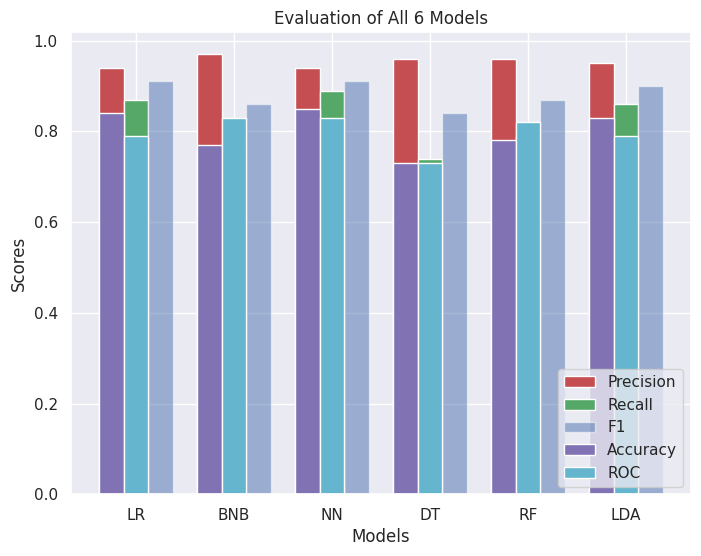

In [ ]:
# Eval of All 6 Models
N = 6
ind = np.arange(N)
width = 0.25

xvals = [0.94,0.97,0.94,0.96,0.96,0.95]
bar1 = plt.bar(ind, xvals, width, color = 'r')

yvals = [0.87,0.77,0.89,0.74,0.79,0.86]
bar2 = plt.bar(ind+width, yvals, width, color='g')

zvals = [0.91,0.86,0.91,0.84,0.87,0.90]
bar3 = plt.bar(ind+width*2, zvals, width, color = 'b', alpha=0.5)

avals = [0.84,0.77,0.85,0.73,0.78,0.83]
bar4 = plt.bar(ind, avals, width, color = 'm')

bvals = [0.79,0.83,0.83,0.73,0.82,0.79]
bar5 = plt.bar(ind+width, bvals, width, color='c')

plt.xlabel("Models")
plt.ylabel('Scores')
plt.title("Evaluation of All 6 Models")

plt.xticks(ind+width,['LR', 'BNB', 'NN', 'DT', 'RF', 'LDA'])
plt.legend( (bar1, bar2, bar3, bar4, bar5),
 ('Precision', 'Recall', 'F1', 'Accuracy', 'ROC'), loc = 'lower right')
plt.show()

## References

GeeksforGeeks. (2023). Supervised and Unsupervised learning. GeeksforGeeks. https://www.geeksforgeeks.org/supervised-unsupervised-learning/

GeeksforGeeks. (2023a). Advantages and Disadvantages of logistic regression. GeeksforGeeks. https://www.geeksforgeeks.org/advantages-and-disadvantages-of-logistic-regression/

Kandel, I. (2020). The effect of batch size on the generalizability of the convolutional neural networks on a histopathology dataset.https://www.sciencedirect.com/science/article/pii/S2405959519303455#:~:text=In%20practical%20terms%2C%20to%20determine,advantage%20of%20the%20GPUs%20processing.

Keras - Models. (n.d.). Tutorialspoint. https://www.tutorialspoint.com/keras/keras_models.htm#:~:text=The%20core%20idea%20of%20Sequential,finally%20reaches%20the%20output%20layer.

Krishnamurthy, B. (2022). An introduction to the RELU activation function. Built In. https://builtin.com/machine-learning/relu-activation-function

Ognjanovski, G. (2022, May 13). Everything you need to know about Neural Networks and Backpropagation — Machine Learning Easy and Fun. Medium. https://towardsdatascience.com/everything-you-need-to-know-about-neural-networks-and-backpropagation-machine-learning-made-easy-e5285bc2be3a

Raj, J. T. (2021, December 8). A beginner’s guide to dimensionality reduction in Machine Learning. Medium. https://towardsdatascience.com/dimensionality-reduction-for-machine-learning-80a46c2ebb7e

Shin, T. (2022, November 10). An extensive step by step guide to exploratory data analysis. Medium. https://towardsdatascience.com/an-extensive-guide-to-exploratory-data-analysis-ddd99a03199e

What is Logistic regression? | IBM. (n.d.). https://www.ibm.com/topics/logistic-regression#:~:text=Resources-,What%20is%20logistic%20regression%3F,given%20dataset%20of%20independent%20variables.

What is a Neural Network? - Artificial Neural Network Explained - AWS. (n.d.). Amazon Web Services, Inc. https://aws.amazon.com/what-is/neural-network/#:~:text=A%20neural%20network%20is%20a,that%20resembles%20the%20human%20brain.

